# EDA: Exploratory Data Analysis

- tools: `pandas`, `seaborn` & `matplotlib`
- concepts:
    - structure
    - granularity
    - scope 
    - temporality
    - faithfulness
    - missingness
    - single variable: shape, central tendency, variability
    - multiple variable EDA (disc./examples coming soon)

<div class="alert alert-warning">
This notebook's code has been updated (2/15/24) with improved approaches to cleaning, with code submitted by a classmate. You'll note your estimates are even closer with these improvements!
</div>

<div class="alert alert-success">
For more information on this topic, check out: (1) Jake VanderPlas' <a href="https://jakevdp.github.io/PythonDataScienceHandbook/" class="alert-link">Python Data Science Handbook</a> and (2) Berkeley's <a href="https://learningds.org/intro.html" class="alert-link">Learning Data Science</a>.
</div>

## Exploratory data analysis (EDA)

> an approach to completely and fully understand your dataset.

It requires a state of flexibility and a willingness to look for both:
- artifacts in the data we anticipate exist 
- artifacts that we don't expect / believe are there



## Setup

In [58]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=1.5)

# import matplotlib
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (14, 7)

# make sure pandas & numpy are imported
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

## Motivating Question(s)

How well do COGS 108 students estimate the following:
- How fast does human hair grow (cm/yr)?
- If every living person stood crammed together side-by-side, how large of an area would they occupy (km²)?
- How many days would it take to walk from San Diego to New York City (assuming no stopping to fix shoes, apply sunscreen, or for sleeping, eating, or other biological needs)?

## The Data

To walk through these concepts today, we're going to use your responses from after the Data Intuition Lecture.

In [59]:
# read data into Python
df = pd.read_csv('data/woc_wi24.csv')

In [60]:
# take a look at the data
df

,Timestamp,How fast does human hair grow (cm/yr)?,"If every living person stood crammed together side-by-side, how large of an area would they occupy (km²)?","How many days would it take to walk from San Diego to New York City (assuming no stopping to fix shoes, apply sunscreen, or for sleeping, eating, or other biological needs)?"
0,1/24/2024 9:50:07,100,the size of Egypt,1 week
1,1/24/2024 9:50:10,5,/,/
2,1/24/2024 9:50:11,10cm/yr,5,32
3,1/24/2024 9:50:14,6,10000,50
4,1/24/2024 9:50:14,5,1000,300
5,1/24/2024 9:50:23,24,1000,50 days
6,1/24/2024 9:50:26,10,1000,25
7,1/24/2024 9:50:27,10cm,100000,3 weeks
8,1/24/2024 9:50:28,0.75,250,100
9,1/24/2024 9:50:28,4,About the size of rhode island (xkcd),365


### Clicker Question #1

Are these data in the tidy data format?

- A) Yes, these data are ready to analyze
- B) Yes, but there is more work to do before analysis
- C) No, not tidy
- D) Have no idea what you're talking about

**Brainstorming**

What considerations do we have to make about these data?
(2PM)
- handling responses that didn't conform to the question that was asked
- handle unit conversions
- ensuring understanding of data responses (i.e. unit/what people said was what we actually asked for)
- column names/titles are really long; harder to work with - shorten to something informative, but short
- don't need timestamp column - can get rid of it
- ensuring floats/numbers when that's what we want

(9AM) 
- standardizing units/making everything on the same scale
- ensuring everything is actually a number (float) ; removing units
- clean up to make usable or remove timestamp

### Tidy Data Rules (Review):

1. Every observation in a row
2. Every variable in a column
3. If multiple tables, column on which to merge

In [61]:
# change column names
df.columns = ['timestamp', 'hair_growth', 'crammed', 'SAN_NYC']
df.head()

,timestamp,hair_growth,crammed,SAN_NYC
0,1/24/2024 9:50:07,100,the size of Egypt,1 week
1,1/24/2024 9:50:10,5,/,/
2,1/24/2024 9:50:11,10cm/yr,5,32
3,1/24/2024 9:50:14,6,10000,50
4,1/24/2024 9:50:14,5,1000,300


In [62]:
# check type of each Series (column)
df.dtypes

timestamp      object
hair_growth    object
crammed        object
SAN_NYC        object
dtype: object

In [63]:
# determine rows and columns in df
df.shape

(59, 4)

## EDA

At this point...we know:

- granularity
- temporality
- scope
- ~faithfulness

Let's check our understanding.

### Clicker Question #2

What's the granularity of this dataset? 

- A) Individual-Level
- B) Group-level
- C) Individual-level over time
- D) Group-level over time

<div class="alert alert-info">
The <b>granularity</b> of your data is what each observation in your data represents.
</div>

### Clicker Question #3

If we wanted to understand something about all COGS 108 students this quarter, could we do that with these data? 

- A) Yes
- B) No
- C) ¯\\\_(ツ)\_/¯

Note: There are currently 700 students enrolled in COGS 108.

<div class="alert alert-info">
The <b>scope</b> of your data describes how helpful these data are with respect to our data science question.
</div>

### Clicker Question #4

How trustworthy do you find these data (given what you've seen so far)?

- A) Definitely ready to use for analysis
- B) Maybe ready to use for analysis
- C) Definitely *not* ready to use for analysis
- D) ¯\\\_(ツ)\_/¯

<div class="alert alert-info">
The <b>faithfulness</b> of your data is a determination of how trustworthy the data are.
</div>

What we don't know (yet)
- missingness
- Single variables: Shape, Central Tendency, Variability
- Relationship across variables?

## Missingness

Data can be missing for all kinds of reasons. It's your job to determine if:
- values are missing at random
- values are missing due to data entry errors
- values are missing due to faulty data collection



In [64]:
# True if row contains at least one null value
# axis argument: 0 for reducing by ‘index’, 1 for reducing by ‘columns’,
null_rows = df.isnull().any(axis=1)
df[null_rows].shape

(0, 4)

In [65]:
# columns with missing values
df.columns[df.isnull().any(axis=0)]

Index([], dtype='object')

In [66]:
# number of missing values by column
df.isnull().sum()

timestamp      0
hair_growth    0
crammed        0
SAN_NYC        0
dtype: int64

## Cleaning: Hair Growth

How fast does human hair grow (cm/yr)?

In [67]:
# take a look at unique values
df["hair_growth"].unique()

array(['100', '5', '10cm/yr', '6', '24', '10', '10cm', '0.75', '4',
       '0.5cm, 1 year', '3', '8', '1yr', '15', '40', '30cm', '70',
       '10-15cm/yr', '10 cm per year', '(6cm/yr)', '150', '15cm/yr', '20',
       '30', '4cm/yr', '30cm per year', '12', '6cm/yr', '10^2', '23',
       '2-4', '2.5', '5cm/yr', '52'], dtype=object)

In [68]:
# standardize height column
def standardize_hair(string):
    
    # Basic string pre-processing
    string = string.lower()
    string = string.strip()  

    # take care of inclded unit cases   
    string = string.replace("cm/yr", "")
    string = string.replace("cm, 1 year", "")
    string = string.replace("cm a year", "")
    string = string.replace("cm/year", "")
    string = string.replace("centimeters", "")
    string = string.replace("cm per year", "")
    string = string.replace("cm/1yr", "")
    string = string.replace("cm/y", "")
    string = string.replace("cm/1 year", "")
    string = string.replace("year", "")
    string = string.replace("yr", "")
    string = string.replace("cm", "")    

    string = string.replace("^2", "0")
    
    string = string.strip()
    
    # Handle ranges by averaging the low and high values
    if "-" in string:
        range_values = string.split("-")
        # Calculate the average of the range values
        output = (float(range_values[0]) + float(range_values[1])) / 2
    else:
        # convert to numeric
        try:
            output = float(eval(string))
        except:
            output = np.nan # this includes the "idk" answer
    
    return output

In [69]:
# apply function across values in hair growth columns
df["hair_growth"] = df["hair_growth"].apply(standardize_hair)
df["hair_growth"].unique()

array([100.  ,   5.  ,  10.  ,   6.  ,  24.  ,   0.75,   4.  ,   0.5 ,
         3.  ,   8.  ,   1.  ,  15.  ,  40.  ,  30.  ,  70.  ,  12.5 ,
       150.  ,  20.  ,  12.  ,  23.  ,   2.5 ,  52.  ])

## Cleaning: Crammed

If every living person stood crammed together side-by-side, how large of an area would they occupy (km²)?

In [70]:
df['crammed'].unique()

array(['the size of Egypt', '/', '5', '10000', '1000', '100000', '250',
       'About the size of rhode island (xkcd)', '100', '100000km',
       '100,000', '500', '30km2', '3 million', '1000000', 'idk',
       'how ever large is 4/9 of the world surface area', '16000',
       '10,000 km^2', '10 billion ', '490000', '500,000', '500000km^2',
       '10^4', '300', '258', '7mil km^2', 'New York', '5000000',
       '700000000', '500000', '4500000', '6000', '16000000', '20000',
       '2000000', '4000000', '4876800'], dtype=object)

In [71]:
# standardize crammed column
def standardize_crammed(string):    
    # Basic string pre-processing
    string = string.lower()
    string = string.strip()
    
    # take care of commas
    string = string.replace(",", "")
    
    # take care of special cases
    string = string.replace("new york", "141299.391")
    string = string.replace("the size of egypt", "1002000")
    string = string.replace("about the size of rhode island (xkcd)", "4001")
    string = string.replace("how ever large is 4/9 of the world surface area", "226711111")

    # take care of inclded unit cases
    string = string.replace("mil km^2", "000000")
    string = string.replace("^2", "")
    string = string.replace("²", "")
    string = string.replace("km", "")
    
    # take care of scientific notation / word cases
    string = string.replace(" million", "000000")
    string = string.replace(" billion", "000000000")

    string = string.strip()

    # convert to numeric
    try:
        output = float(eval(string))
    except:
        output = np.nan # this includes the "idk" and "/" case
    
    return output

In [72]:
# apply function across values in crammed columns
df["crammed"] = df["crammed"].apply(standardize_crammed)
df["crammed"].unique()

array([1.00200000e+06,            nan, 5.00000000e+00, 1.00000000e+04,
       1.00000000e+03, 1.00000000e+05, 2.50000000e+02, 4.00100000e+03,
       1.00000000e+02, 5.00000000e+02, 3.02000000e+02, 3.00000000e+06,
       1.00000000e+06, 2.26711111e+08, 1.60000000e+04, 1.00000000e+10,
       4.90000000e+05, 5.00000000e+05, 1.40000000e+01, 3.00000000e+02,
       2.58000000e+02, 7.00000000e+06, 1.41299391e+05, 5.00000000e+06,
       7.00000000e+08, 4.50000000e+06, 6.00000000e+03, 1.60000000e+07,
       2.00000000e+04, 2.00000000e+06, 4.00000000e+06, 4.87680000e+06])

## Cleaning: San Diego to NYC

How many days would it take to walk from here to New York City (assuming no stopping to fix shoes, apply sunscreen, or for sleeping, eating, or other biological needs)?

In [73]:
df['SAN_NYC'].unique()

array(['1 week', '/', '32', '50', '300', '50 days', '25', '3 weeks',
       '100', '365', '150', '30', '90 days', '70', '40', '700days',
       '1 year', '280', '58',
       'since i know it takes roughly a week to get from here to east coast, i would say 1.5-2 months',
       '125 days', '250', '80 days', '1 year ', '20 days', '1000', '15',
       '75', '24 days (2800 miles / 5mph)', '10^5', '24', '90', '5 hrs',
       '166', '200', '17', '20', '42', '2 years'], dtype=object)

In [74]:
# a more general approach compared to above
def dist_helper(distance):
    if len(distance) == 1:
        return distance[0]
    if distance[1] == '*':
        return str(float(distance[0]) * float(distance[2]))
    if distance[1] == '/':
        return str(float(distance[0]) / float(distance[2]))
    
    # account for the case with 1.5-2 months
    for part in distance:
        if '-' in part:
            numbers = [float(num) for num in part.split('-')]
            # Calculate the average of the range
            avg_value = sum(numbers) / len(numbers)*30.44 #approx how many days in a month
            return str(avg_value)
    for part in distance:
        if part.isdigit():
            return part

df["SAN_NYC"] = pd.to_numeric(df["SAN_NYC"].
                              str.lower().
                              replace({"days?":"", 
                                       "\^":"e", "^\([\w */)=?]+$":"1000",
                                       " weeks?":" * 7",
                                       " months?":" * 30", 
                                       " ho?u?rs?": " / 24", 
                                       " years?": " * 365"}, regex = True).
                              str.strip().
                              str.split(' ').
                              apply(dist_helper), errors = 'coerce')

In [75]:
# apply function across values in crammed columns
df["SAN_NYC"].unique()

array([7.00000000e+00,            nan, 3.20000000e+01, 5.00000000e+01,
       3.00000000e+02, 2.50000000e+01, 2.10000000e+01, 1.00000000e+02,
       3.65000000e+02, 1.50000000e+02, 3.00000000e+01, 9.00000000e+01,
       7.00000000e+01, 4.00000000e+01, 7.00000000e+02, 2.80000000e+02,
       5.80000000e+01, 5.32700000e+01, 1.25000000e+02, 2.50000000e+02,
       8.00000000e+01, 2.00000000e+01, 1.00000000e+03, 1.50000000e+01,
       7.50000000e+01, 2.40000000e+01, 1.00000000e+06, 2.08333333e-01,
       1.66000000e+02, 2.00000000e+02, 1.70000000e+01, 4.20000000e+01,
       7.30000000e+02])

#### Return to missingness

Note that after cleaning, we DO have missing values. These would be worth looking into further; being sure we understand *why* they're missing

In [76]:
# number of missing values by column
df.isnull().sum()

timestamp      0
hair_growth    0
crammed        2
SAN_NYC        1
dtype: int64

In [77]:
null_rows = df.isnull().any(axis=1)
df[null_rows]

,timestamp,hair_growth,crammed,SAN_NYC
1,1/24/2024 9:50:10,5.0,NaN,NaN
21,1/24/2024 9:51:42,10.0,NaN,58.0


## The Cleaned Data

In [78]:
df

,timestamp,hair_growth,crammed,SAN_NYC
0,1/24/2024 9:50:07,100.00,1.002000e+06,7.000000
1,1/24/2024 9:50:10,5.00,NaN,NaN
2,1/24/2024 9:50:11,10.00,5.000000e+00,32.000000
3,1/24/2024 9:50:14,6.00,1.000000e+04,50.000000
4,1/24/2024 9:50:14,5.00,1.000000e+03,300.000000
5,1/24/2024 9:50:23,24.00,1.000000e+03,50.000000
6,1/24/2024 9:50:26,10.00,1.000000e+03,25.000000
7,1/24/2024 9:50:27,10.00,1.000000e+05,21.000000
8,1/24/2024 9:50:28,0.75,2.500000e+02,100.000000
9,1/24/2024 9:50:28,4.00,4.001000e+03,365.000000


### Clicker Question #5

What could we have done to avoid these cleaning/wrangling issues?

- A) I have some ideas.
- B) I've thought but I have no idea.
- C) I'm unsure what we're supposed to be thinking about

**Brainstorming**
- response validation - ensuring that if we want a number, it's all you can enter
- specifying units (making this super clear) - have it be fill in the blank
- as you approach cleaning, actually account for all responses
- do activity during class rather than at the end when students are rushing out to ensure higher response rates and use the ability to talk out loud to ensure people knew what we wanted

(9 AM)
- fixed units, with drop-down digits/numbers
- in the question itself give an example of correct format
- have additional option to explicitly indicate "I don't know" (or other NaN values) 
- change question response to fill in the blank (such that it "forces" number/thinking
- required questions and specific data types (Response Validation - force a numeric response)
- maybe give students enough time during class rather than when they're rushing out the door and be explicit in instructions out loud that we're looking for numbers
- when you open it, put a timer on how long students have to respond (longer window to complete; timed when completing)

## Aside: Anscombe's Quartet: A Cautionary Tale

Code in this example taken from [here](https://matplotlib.org/gallery/specialty_plots/anscombe.html).

In [79]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


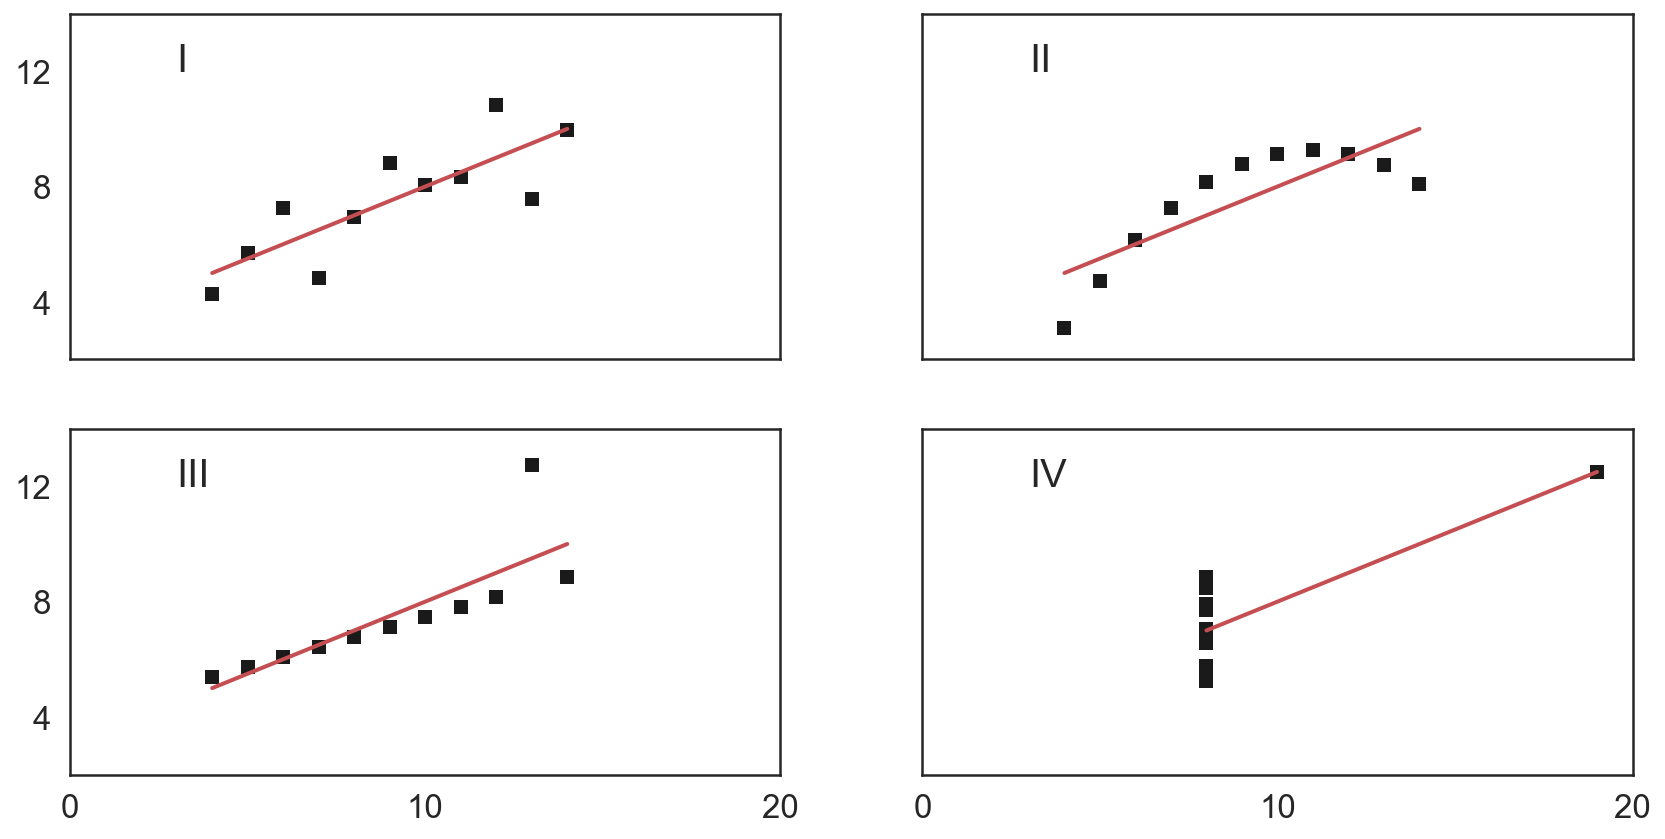

In [80]:
def fit(x):
    return 3 + 0.5 * x

xfit = np.array([np.min(x), np.max(x)])

plt.subplot(221)
plt.plot(x, y1, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'I', fontsize=20)

plt.subplot(222)
plt.plot(x, y2, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticks=(0, 10, 20), xticklabels=[],
         yticks=(4, 8, 12), yticklabels=[], )
plt.text(3, 12, 'II', fontsize=20)

plt.subplot(223)
plt.plot(x, y3, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.text(3, 12, 'III', fontsize=20)
plt.setp(plt.gca(), yticks=(4, 8, 12), xticks=(0, 10, 20))

plt.subplot(224)
xfit = np.array([np.min(x4), np.max(x4)])
plt.plot(x4, y4, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), yticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'IV', fontsize=20)

# verify the stats
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))

plt.show()

### Draw the Graph (What a complete EDA is all about!)

## Shape

- range of values
- overall shape
- outliers? 

### Outliers

Outliers are values that fall outside the typical range of your dataset. These can occur for all types of reasons:

- data entry errors
- poor sampling procedures
- technical or mechanical errors
- unexpected changes in weather
- extreme values
- people giving incorrect information
- etc.

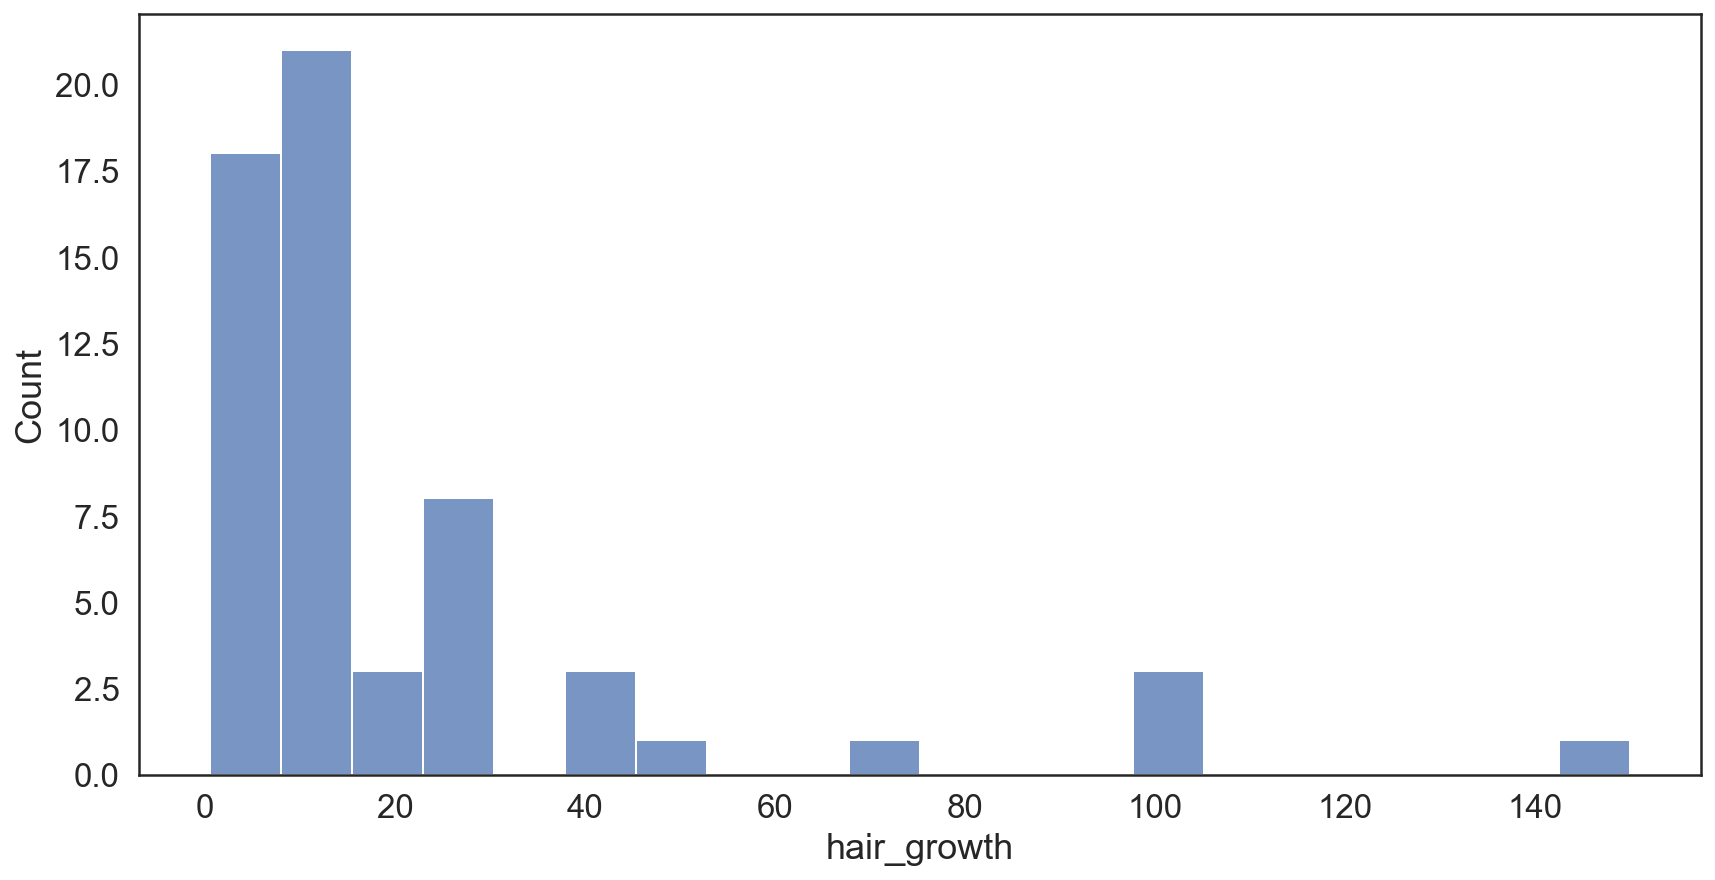

In [81]:
sns.histplot(df['hair_growth'], bins=20);

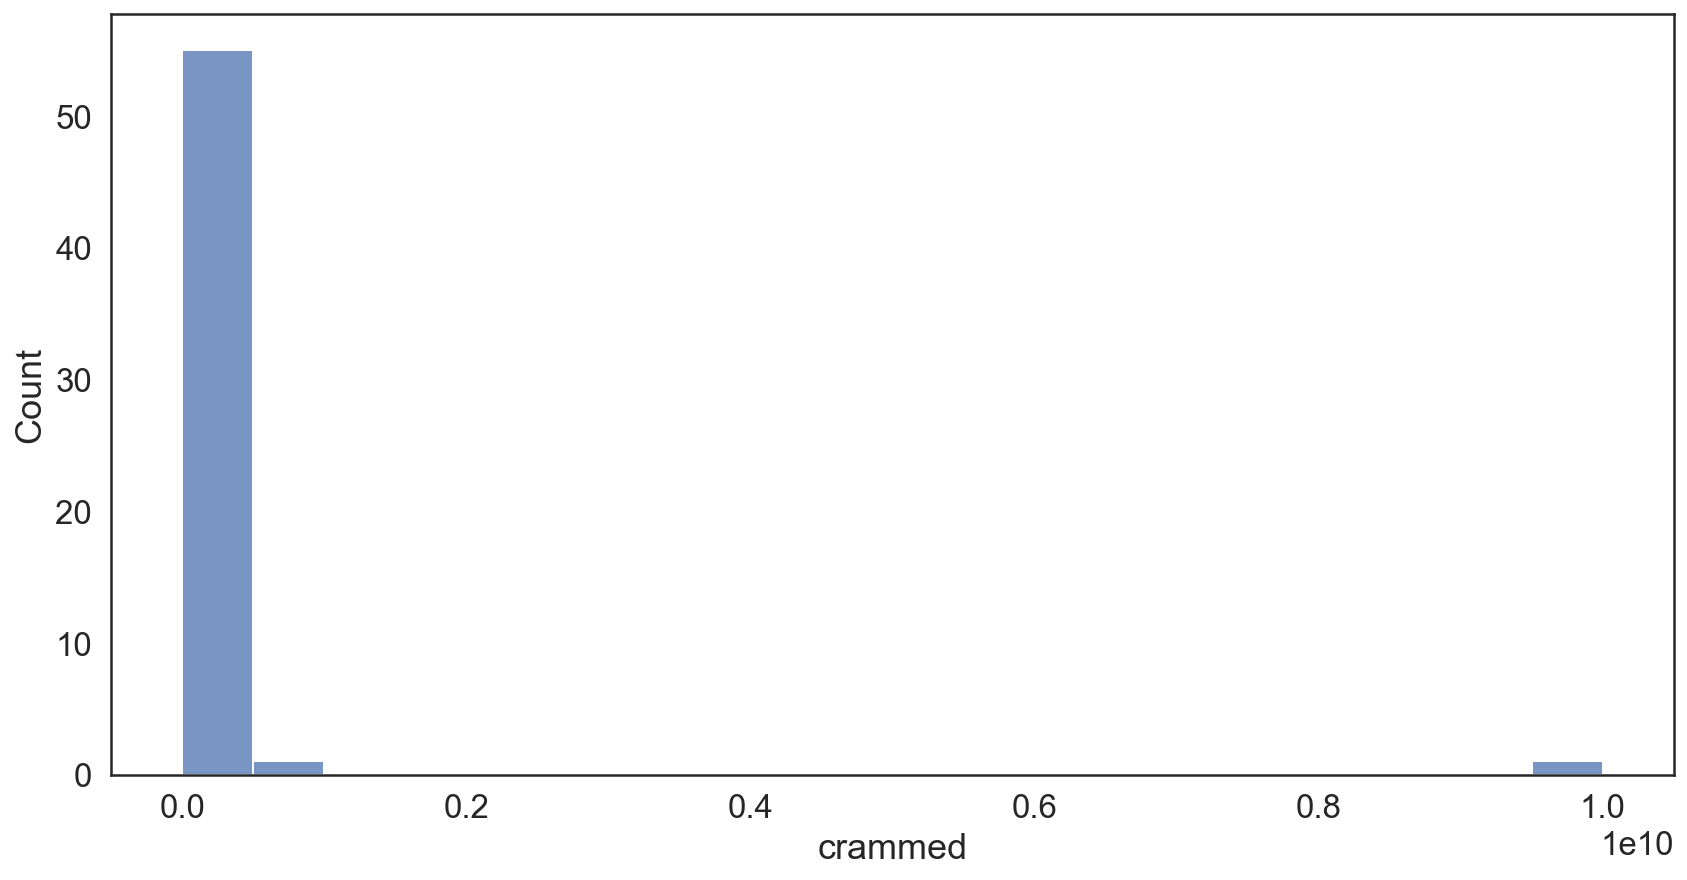

In [82]:
sns.histplot(df['crammed'], bins=20);

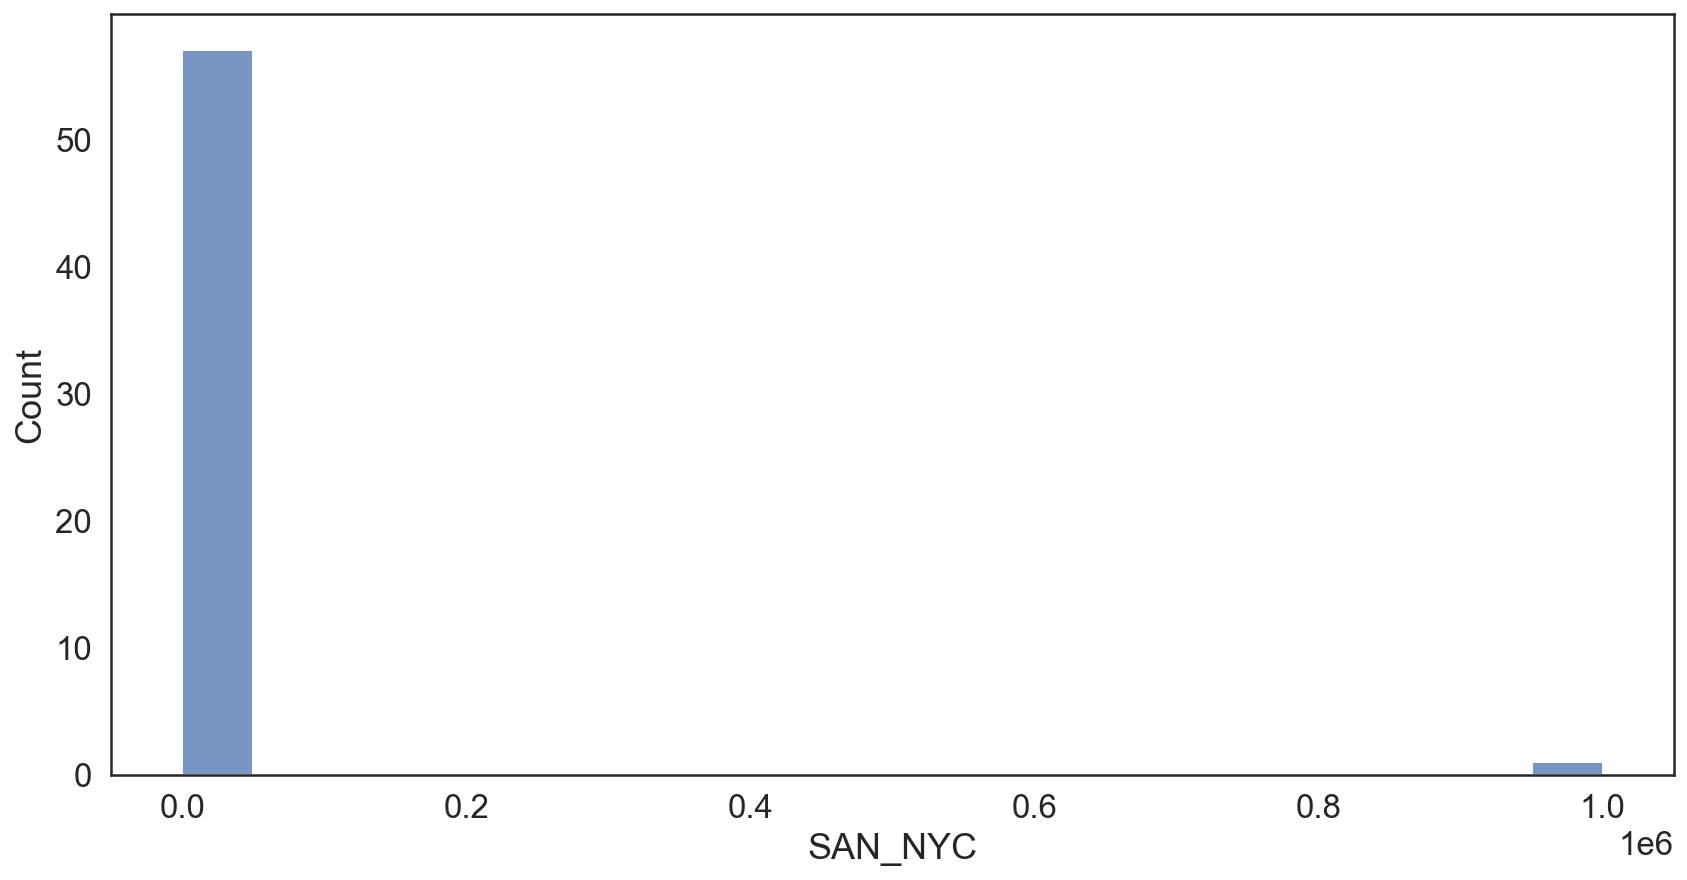

In [83]:
sns.histplot(df['SAN_NYC'], bins=20);

<div class="alert alert-danger">
Caution: Observations should only be removed from your dataset if you have a valid reason to do so. If you remove outliers from your dataset, your report should be <b>very</b> clear that you did so.
</div>

### Clicker Question #6

Should we remove any outlier values in this dataset? 

- A) Yes
- B) No
- C) ¯\\\_(ツ)\_/¯

## Central Tendency

- mean 
- median
- mode

The Central Tendency tells you the 'typical' value for an observation in your dataset.

### Mean


$$ \bar x = \frac{\sum\limits_{i = 1}^N x_i}N  $$


- $x_i$ = ith element of the sample
- $\bar x$ = sample mean
- $N$ = sample size


In [84]:
df['hair_growth'].mean()

21.800847457627118

In [85]:
# check mean for each column
df.mean(numeric_only=True)

hair_growth    2.180085e+01
crammed        1.926142e+08
SAN_NYC        1.737132e+04
dtype: float64

### Median

In [86]:
# check median for each column
df.median()

hair_growth       10.000
crammed        10000.000
SAN_NYC           55.635
dtype: float64

### Median vs. Mean

When the median and mean are not similar to one another...what's the best approach?

In [87]:
# median and mean for same series
print( 'median: ', df['hair_growth'].median())
print( 'mean: ', df['hair_growth'].mean())

median:  10.0
mean:  21.800847457627118


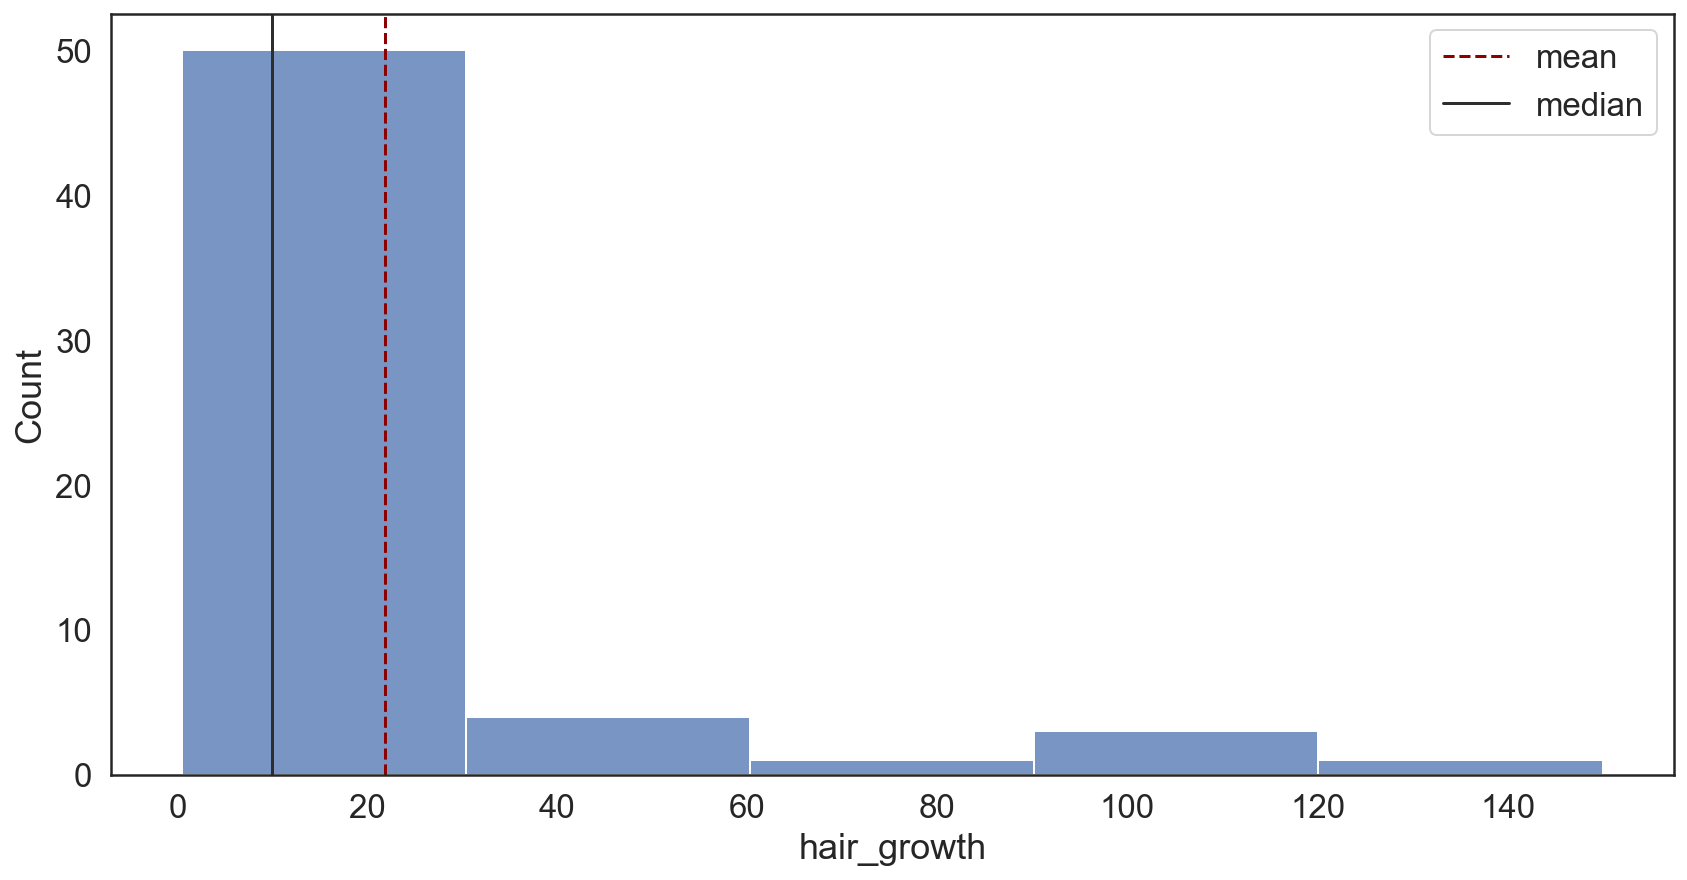

In [88]:
# take a look at it all together
ax = sns.histplot(df['hair_growth'], bins=5);
ax.axvline(df['hair_growth'].mean(), color='darkred', linestyle='--', label='mean');
ax.axvline(df['hair_growth'].median(), color='#2e2e2e', linestyle='-', label='median')
ax.legend();

### Clicker Question #7

Which of the following is the best way to measure the central tendency of `hair_growth` in these data?

- A) mean
- B) median
- C) mode

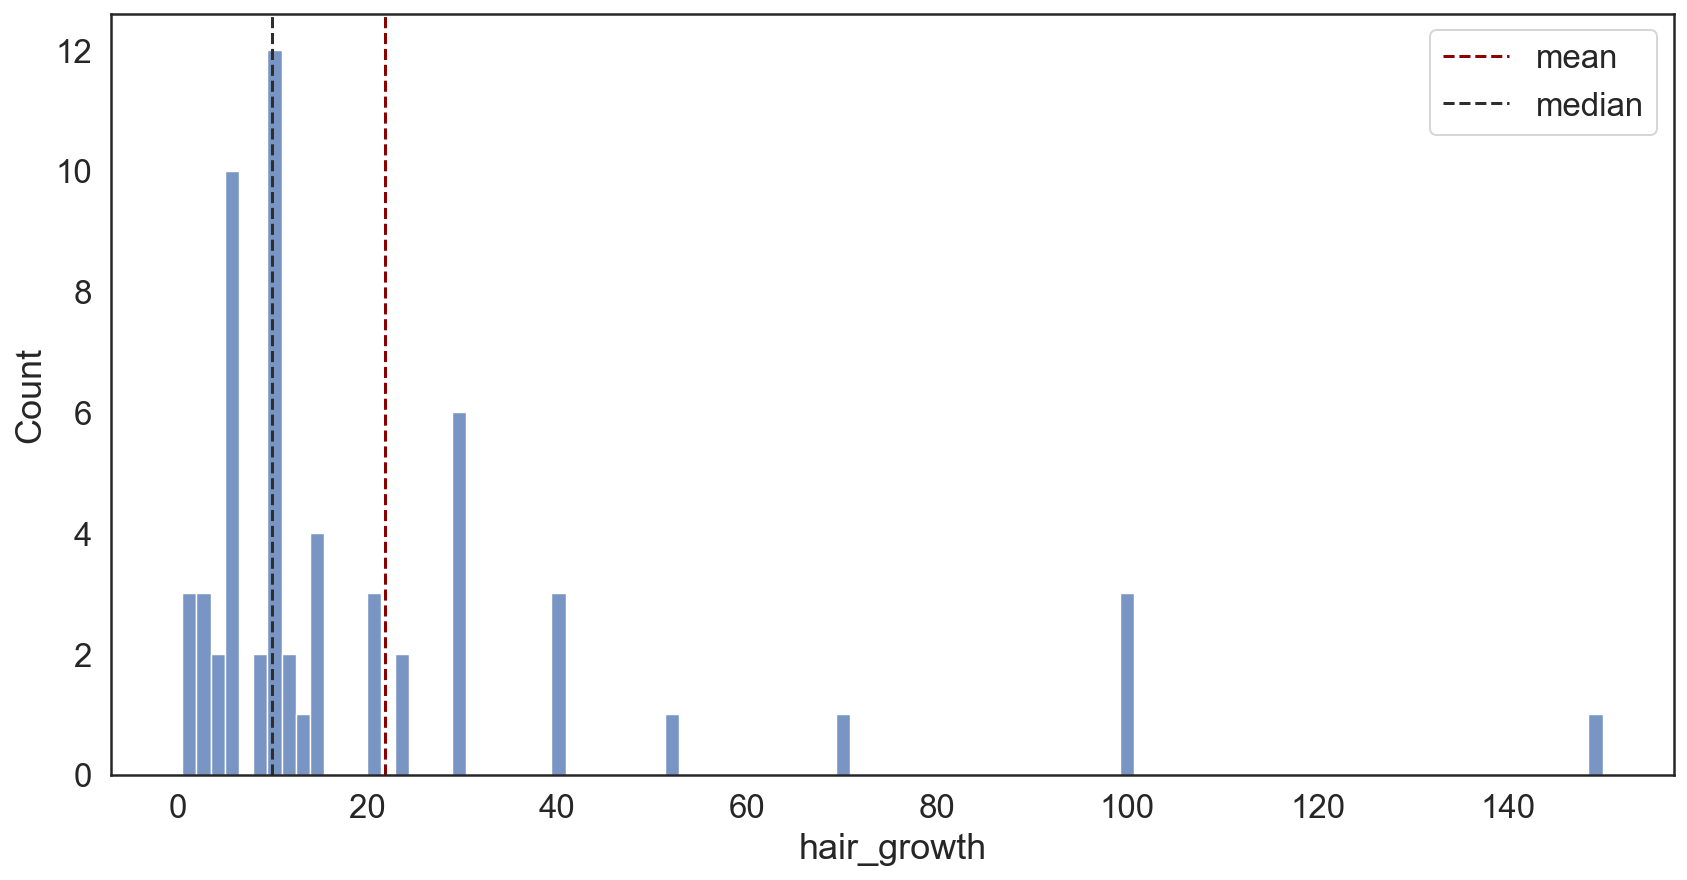

In [89]:
# increase the number of bins here
ax = sns.histplot(df['hair_growth'], bins=100);
ax.axvline(df['hair_growth'].mean(), color='darkred', linestyle='--', label='mean');
ax.axvline(df['hair_growth'].median(), color='#2e2e2e', linestyle='--', label='median')
ax.legend();

#### How did y'all do?

How well do COGS 108 students estimate the following:
- How fast does human hair grow (cm/yr)?
- If every living person stood crammed together side-by-side, how large of an area would they occupy (km²)?
- How many days would it take to walk from San Diego to New York City (assuming no stopping to fix shoes, apply sunscreen, or for sleeping, eating, or other biological needs)?

In [90]:
# compare to actual value: 15 cm/year (~6 in)
df["hair_growth"].median()

10.0

In [91]:
# compare to actual value: 1,000-10,000 km^2)
df['crammed'].median()

10000.0

In [92]:
# compare to actual value: 38 days)
df['SAN_NYC'].median()

55.635000000000005

Calculating the mean and median of your sample is helpful when dealing with **quantitative variables**.

When working with **categorical variables**, knowing the mode is helpful.

### Mode

When working with categorical data, the mode is the most common value in the dataset.

### Aside: Why Central Tendency Doesn't Tell the Whole Story

In [41]:
# generate two different normal distributions
dist_1 = np.random.normal(5, 2, 1000)
dist_2 = np.random.normal(5, 10, 1000)

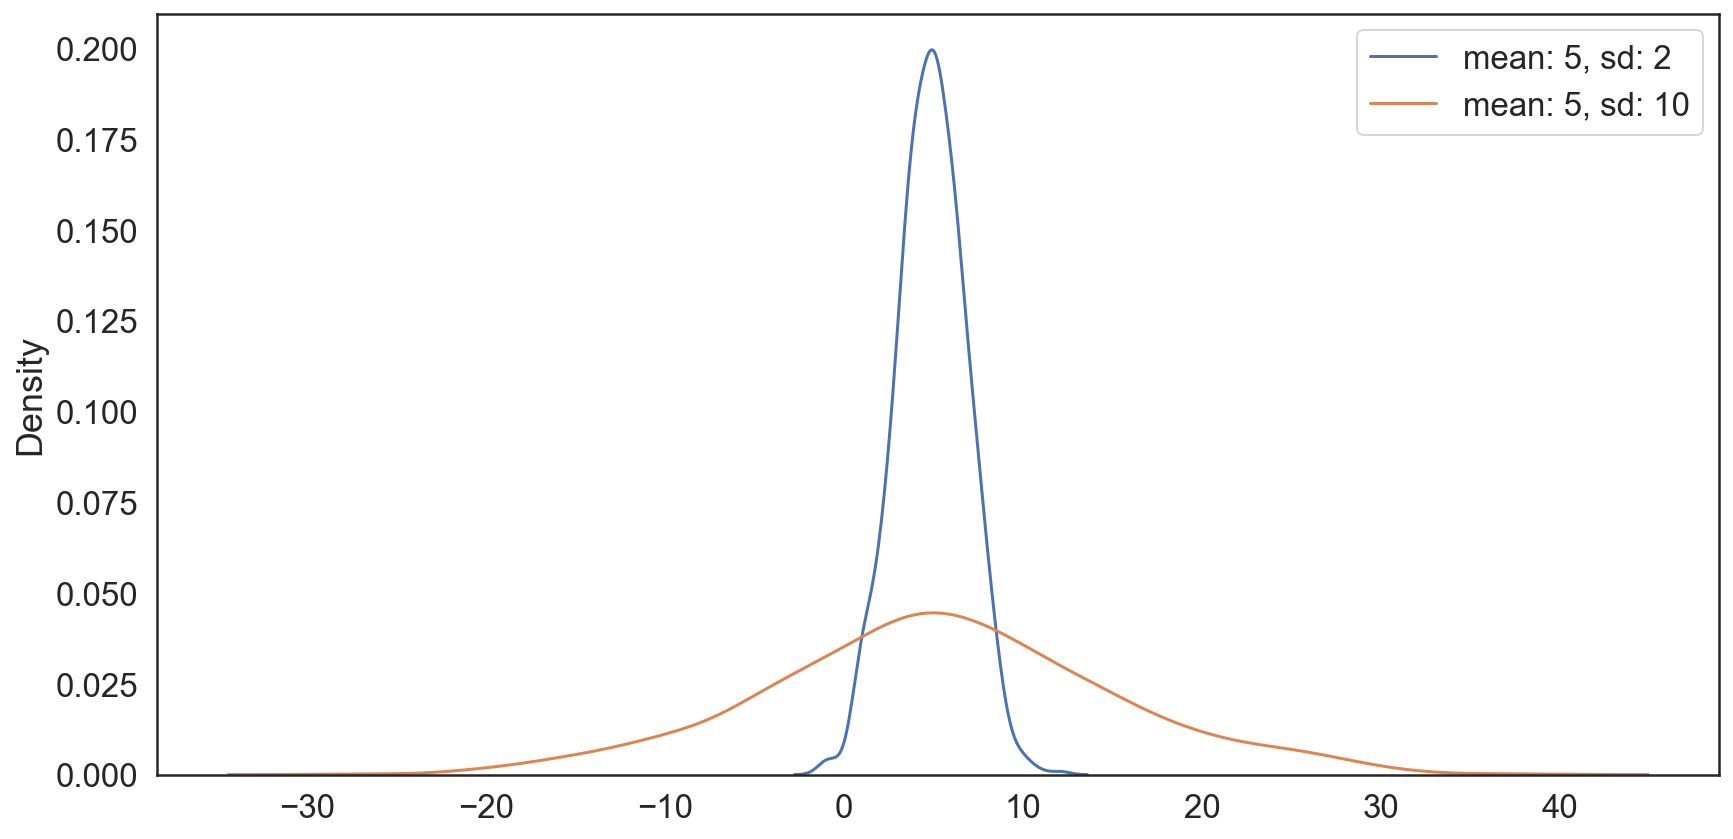

In [57]:
# plot distributions side by side
sns.kdeplot(data=dist_1, label="mean: 5, sd: 2")
sns.kdeplot(data=dist_2, label="mean: 5, sd: 10")
plt.legend();

## Variability

- Range
- IQR 
- Variance & Standard Deviation

### Range

The highest value minus the lowest value.

In [43]:
# determine the 25th and 75th percentiles
min_val = df['hair_growth'].min()
max_val = df['hair_growth'].max()
range_vals =  max_val - min_val
print(max_val, '-' , min_val,' = ',  range_vals)

150.0 - -5.0  =  155.0


### IQR (Interquartile Range)

75th percentile - 25th percentile

In [ ]:
np.percentile?

In [44]:
# determine the 25th and 75th percentiles
lower, upper = np.nanpercentile(df['hair_growth'], [25, 75])
lower, upper

(6.0, 28.5)

In [45]:
# calculate IQR
iqr = upper - lower
iqr

22.5

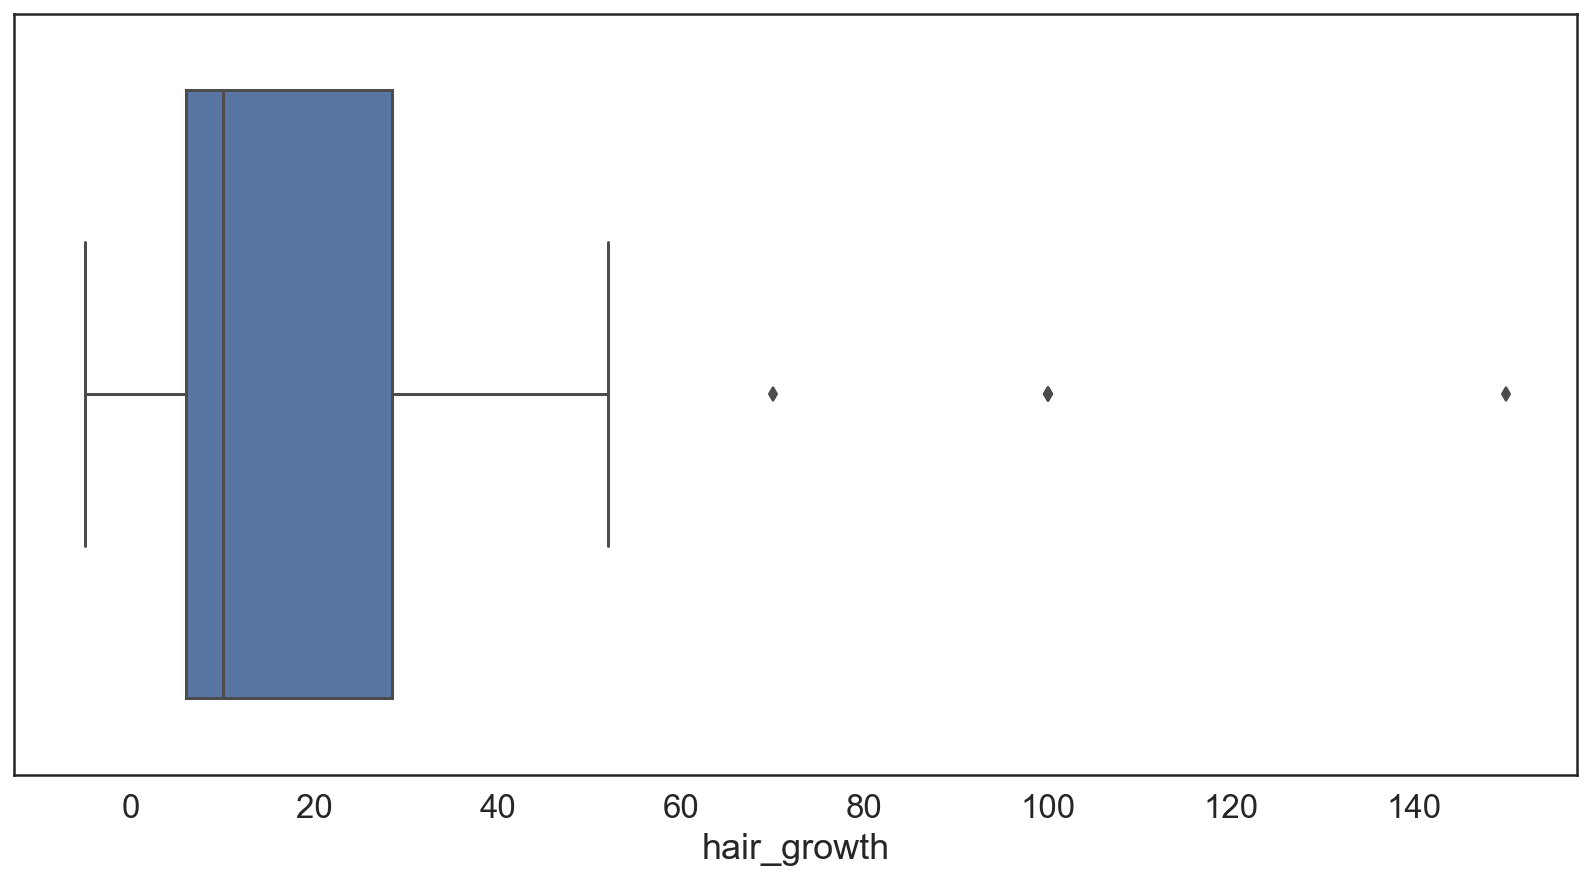

In [46]:
# visualizing IQR
sns.boxplot(x='hair_growth', data=df);

### Variance & Standard Deviation

- variance
    - measures how close the values in the distribution are to the middle of the distribution
    - average squared difference of the scores from  the mean
- standard deviation
    - square root of the variance

#### Variance

$$ s^2 = \frac {\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 }} {(N-1)} $$

- $s^2$ = sample variance
- $x_i$ = ith element of the sample
- $\bar x$ = mean of the sample
- $N$ = sample size


In [47]:
# calculate variance using pandas
var = df['hair_growth'].var()
var

842.1931526013309

#### Standard Deviation
square root of the variance

$$ s = \sqrt {\frac {\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 }} {(N-1)}} $$

In [48]:
np.sqrt(var)

29.020564305356483

In [49]:
# calculate variance using pandas
sd = df['hair_growth'].std()
sd 

29.020564305356483

## Descriptive Tables

Helpful for understanding your data...but not the best explanatory visualization.

In [53]:
df.describe()

,hair_growth,crammed,SAN_NYC
count,58.000000,5.200000e+01,55.000000
mean,21.780172,2.066182e+08,18317.436364
std,29.020564,1.388118e+09,134821.482371
min,-5.000000,5.000000e+00,7.000000
25%,6.000000,2.560000e+02,36.000000
50%,10.000000,1.000000e+04,70.000000
75%,28.500000,5.000000e+05,150.000000
max,150.000000,1.000000e+10,1000000.000000


### Clicker Question #8

What would be the next step in this analysis to answer our question of interest?

- A) I have some ideas on next steps.
- B) I think the analysis is complete.
- C) ¯\\\_(ツ)\_/¯

### Clicker Question #9

Final thoughts: Should you ensure that all plots you make during the EDA process adhere to data visualization best practices?
    
- A) Yes.
- B) No.
- C) ¯\\\_(ツ)\_/¯